<a href="https://colab.research.google.com/github/somanshu1/FinProject/blob/main/Portfolio_Analysi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

In [3]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [ ]:
data=yf.download(tickers.Symbol.to_list(),'2021-01-01')['Adj Close']

In [5]:
returns = data.pct_change().dropna()

In [6]:
expected_returns = returns.mean()*252
cov_matrix= returns.cov()*252

In [7]:
def portfolio_varaince(W):
  return((W.dot(cov_matrix)).dot(W))

In [8]:
n_assets=len(data.columns)

In [12]:
initial_weight= np.array([1/n_assets for i in range(n_assets)])

In [13]:
target_returns = np.linspace(expected_returns.min(), expected_returns.max(), 100)


In [22]:
target_vol=np.array([])
for target_return in target_returns:
  constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                {'type': 'eq', 'fun': lambda x: x.dot(expected_returns) - (target_return)})
  bounds = [[0, 1]] * n_assets
  result = minimize ( portfolio_varaince, initial_weight,method='SLSQP', bounds = bounds, constraints= constraints)
  target_vol = np.append(target_vol,result.fun ** (1/2) )

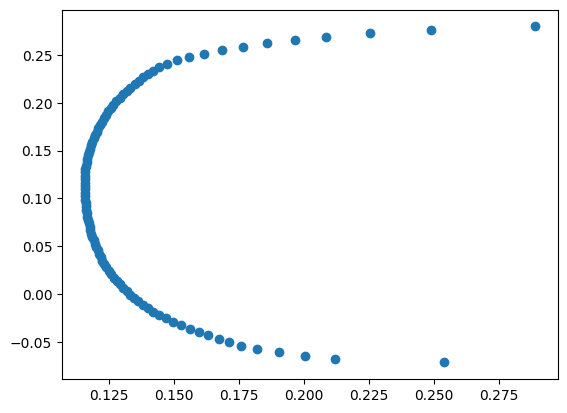

In [27]:
plt.scatter(target_vol,target_returns)

In [ ]:
target_vol
n_assets